In [ ]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Performing Inspection on the data

In [ ]:
house_price = pd.read_csv('train.csv')

In [ ]:
house_price.shape

(1460, 81)

In [ ]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#Checking for null values
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

In [ ]:
#We will delete for columns having more than 10% missing values

In [ ]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [ ]:
house_price = house_price.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

In [ ]:
#We will check the remaining columns
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.00]


MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [ ]:
#Now we will find out the age of the house
house_price['YearBuilt_Old'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageYrBlt_Old'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Old'] = house_price.YrSold.max()-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)
             

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1050,2007,2007,2007.0,2007,3,3,3.0,3
290,2006,2006,2006.0,2006,4,4,4.0,4
1195,2005,2005,2005.0,2008,5,5,5.0,2
380,1924,1950,1924.0,2010,86,60,86.0,0
865,1970,1970,1973.0,2009,40,40,37.0,1
1073,1977,1977,1977.0,2009,33,33,33.0,1
1040,1957,2000,1957.0,2006,53,10,53.0,4
1168,1935,1986,1935.0,2008,75,24,75.0,2
1209,2006,2006,2006.0,2006,4,4,4.0,4
1245,1984,2003,1984.0,2007,26,7,26.0,3


In [ ]:
#We will drop the year column
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [ ]:
house_price.MasVnrType.fillna('None',inplace=True)
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(),inplace=True)
house_price.BsmtQual.fillna('TA',inplace=True)
house_price.BsmtCond.fillna('TA',inplace=True)
house_price.BsmtExposure.fillna('No',inplace=True)
house_price.BsmtFinType1.fillna('Unf',inplace=True)
house_price.BsmtFinType2.fillna('Unf',inplace=True)
house_price.GarageType.fillna('Attchd',inplace=True)
house_price.GarageYrBlt_Old.fillna(-1,inplace=True)
house_price.GarageFinish.fillna('Unf',inplace=True)
house_price.GarageQual.fillna('TA',inplace=True)
house_price.GarageCond.fillna('TA',inplace=True)

In [ ]:
house_price.Street.value_counts()
house_price.Utilities.value_counts()
house_price = house_price.drop(['Street','Utilities'],axis='columns')

In [ ]:
house_price = house_price.drop('Id',axis='columns')

In [ ]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


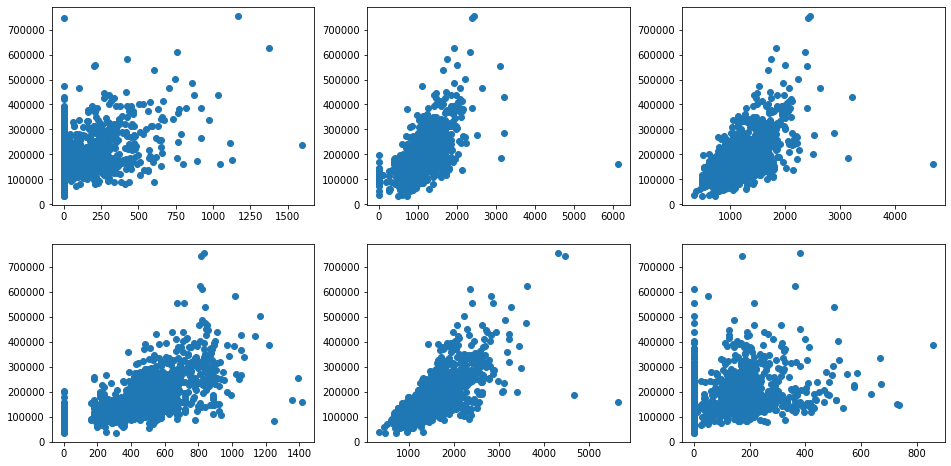

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)
#Most of our data looks linear if not perfectly linear but somewhat

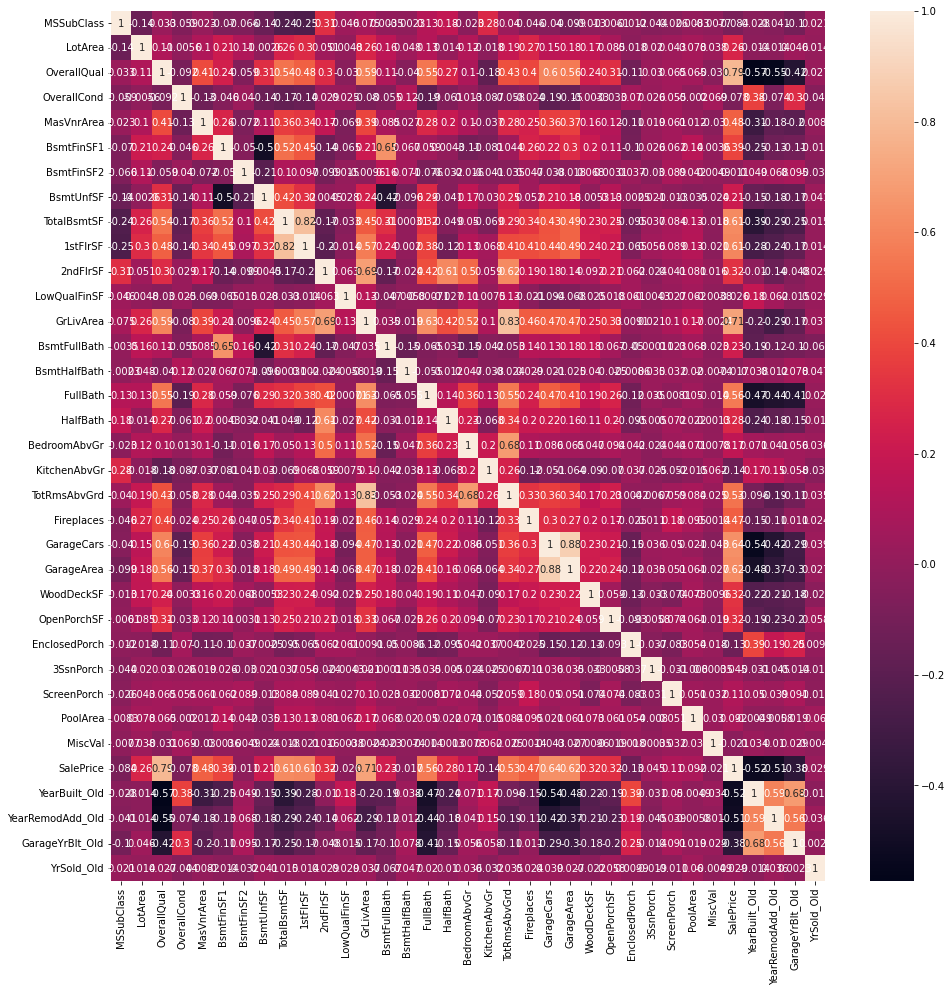

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [ ]:
#Now we will deal with the ourliers
num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [ ]:
#Now we will deal with columns having ordinal categorical data
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [ ]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [ ]:
#We will convert the categorical variables to dummy variables
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price = pd.concat([house_price,dummy_col],axis='columns')

house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

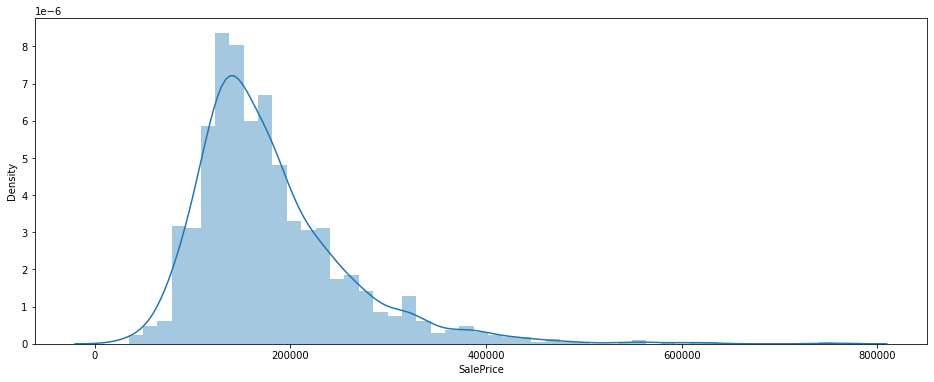

In [ ]:
#Checking the target variable's distribution
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

In [ ]:
#Creating the train test split
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
#Scaling the training data
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

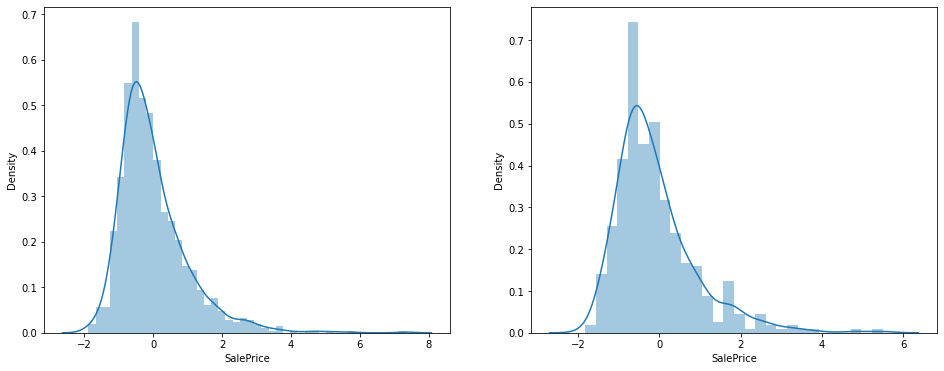

In [ ]:
#Checking the distribution again
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [ ]:
#Spiliting the dependent and independent variables
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [ ]:
#Using RFE to find optimal columns
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [ ]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [ ]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [ ]:
#Lasso Model
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8962177861216615
0.8454863927271712


In [ ]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.178),
 ('LotArea', 0.202),
 ('LotShape', 0.108),
 ('LandSlope', 0.142),
 ('OverallQual', 0.148),
 ('OverallCond', 0.038),
 ('MasVnrArea', -0.0),
 ('ExterQual', 0.076),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.038),
 ('BsmtCond', -0.023),
 ('BsmtExposure', 0.308),
 ('BsmtFinType1', 0.139),
 ('BsmtFinSF1', 0.103),
 ('BsmtFinType2', 0.049),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.139),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', -0.0),
 ('CentralAir', 0.204),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.231),
 ('GrLivArea', -0.111),
 ('BsmtFullBath', -0.115),
 ('BsmtHalfBath', -0.122),
 ('FullBath', -0.082),
 ('HalfBath', 0.243),
 ('BedroomAbvGr', 0.382),
 ('KitchenAbvGr', -0.088),
 ('KitchenQual', 0.122),
 ('TotRmsAbvGrd', 0.097),
 ('Fireplaces', -0.071),
 ('GarageFinish', 0.096),
 ('GarageCars', -2.134),
 ('GarageArea', -0.178),
 ('GarageQual', 0.0),
 ('GarageCond', -0.0),
 ('WoodDeckSF', -0.208),
 ('OpenPorchSF', -0.052),
 ('EnclosedPorch', -0.071),
 ('3SsnPorc

In [ ]:
#Now we will improve the model using GridSearch
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.110264,0.049903,0.005949,0.002967,0.001,{'alpha': 0.001},0.842041,0.906953,0.831520,0.873616,0.901948,0.890782,0.896534,0.475776,0.891337,0.933199,0.844371,0.126131,1,0.899552,0.893956,0.901976,0.898265,0.895025,0.895727,0.895343,0.908306,0.897030,0.892971,0.897815,0.004334
1,0.037766,0.006322,0.010439,0.004009,0.010,{'alpha': 0.01},0.812901,0.863279,0.835581,0.832990,0.871562,0.853866,0.875660,0.418558,0.869551,0.925440,0.815939,0.135574,2,0.848494,0.844136,0.847094,0.844801,0.843239,0.842810,0.842151,0.875629,0.845532,0.840392,0.847428,0.009665
2,0.014964,0.013755,0.004104,0.002007,0.100,{'alpha': 0.1},0.737558,0.818260,0.772405,0.755166,0.817468,0.792222,0.818180,0.526480,0.834435,0.882284,0.775446,0.091891,3,0.797799,0.791007,0.789925,0.797497,0.792001,0.793017,0.787020,0.823363,0.792932,0.787837,0.795240,0.009959
3,0.010820,0.003950,0.003913,0.001627,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011498,0.011066,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.009748,0.003808,0.003206,0.000300,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011498,0.011066,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


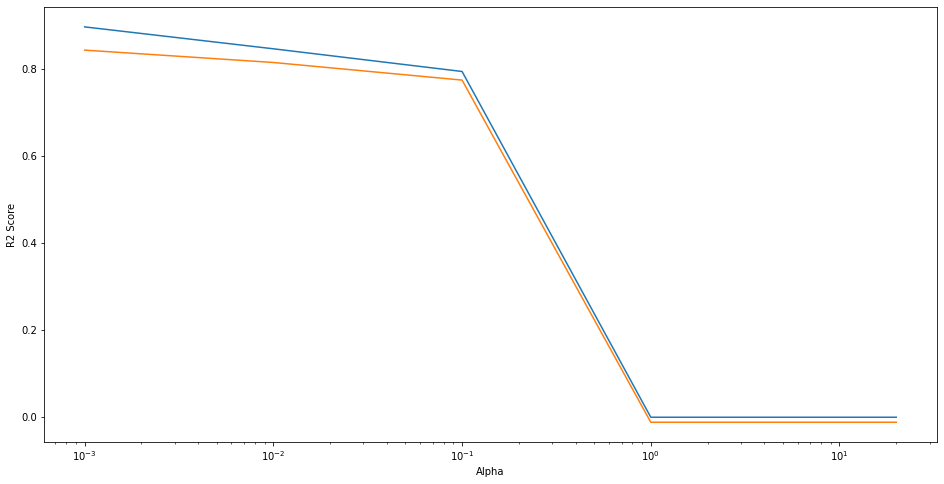

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [ ]:
# Checking the best Alpha value
model_cv.best_params_

{'alpha': 0.001}

In [ ]:
#Fitting Lasso with 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8962177861216615
0.8454863927271712


In [ ]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [ ]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
47,GarageYrBlt_Old,1.513187
67,Neighborhood_Gilbert,0.382738
28,BedroomAbvGr,0.381583
11,BsmtExposure,0.308031
27,HalfBath,0.243342
22,LowQualFinSF,0.230579
19,CentralAir,0.203891
1,LotArea,0.202370
48,YrSold_Old,0.162767
64,Neighborhood_CollgCr,0.154099


In [ ]:
#Next we will use Ridge Regression
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9020729114752213
0.8334331614198944


In [ ]:
#Now we will improve our model using GridSearch
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020552,0.006104,0.007756,0.005036,0.001,{'alpha': 0.001},0.842415,0.909447,0.786573,0.874910,0.897183,0.890619,0.893144,0.559176,0.880275,0.930450,0.846419,0.102865,8,0.905053,0.900122,0.908960,0.904469,0.901080,0.901978,0.901125,0.913937,0.902880,0.899001,0.903860,0.004320
1,0.017949,0.003169,0.004460,0.002729,0.010,{'alpha': 0.01},0.843155,0.909405,0.789332,0.874875,0.897384,0.890683,0.893221,0.558525,0.880481,0.930497,0.846756,0.102910,7,0.905051,0.900121,0.908956,0.904468,0.901079,0.901977,0.901124,0.913936,0.902879,0.899000,0.903859,0.004320
2,0.016026,0.002064,0.006388,0.004573,0.100,{'alpha': 0.1},0.848176,0.908946,0.812362,0.874541,0.899048,0.891254,0.893839,0.552530,0.882368,0.930927,0.849399,0.103734,5,0.904941,0.900037,0.908651,0.904390,0.900994,0.901892,0.901041,0.913902,0.902797,0.898919,0.903756,0.004305
3,0.021834,0.006675,0.008126,0.006794,0.200,{'alpha': 0.2},0.850997,0.908373,0.830659,0.874195,0.900358,0.891780,0.894287,0.546788,0.884154,0.931332,0.851292,0.105030,4,0.904694,0.899828,0.907947,0.904193,0.900780,0.901679,0.900834,0.913815,0.902589,0.898714,0.903507,0.004279
4,0.016043,0.002247,0.005050,0.002015,0.500,{'alpha': 0.5},0.853920,0.906484,0.860710,0.873289,0.902541,0.892927,0.894845,0.533502,0.888097,0.932251,0.853857,0.108957,3,0.903622,0.898825,0.905078,0.903233,0.899759,0.900655,0.899839,0.913395,0.901555,0.897719,0.902368,0.004269


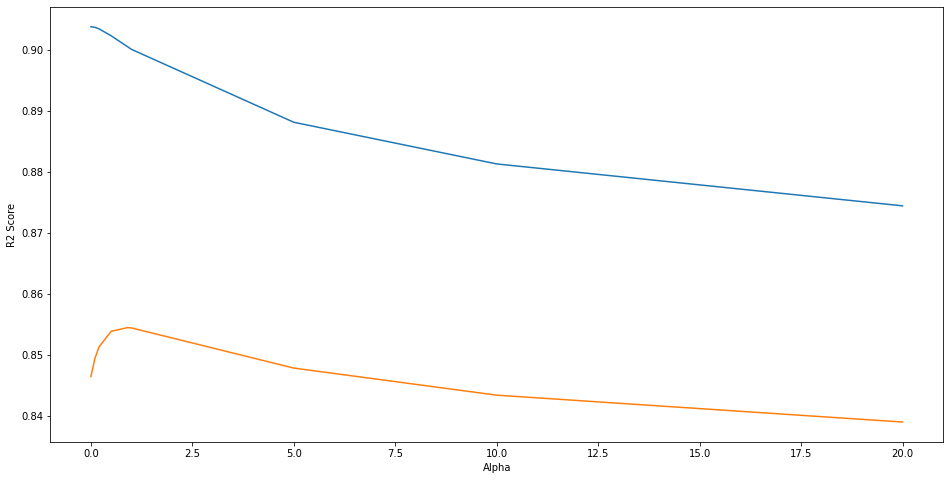

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [ ]:
# Checking the best Alpha value
model_cv.best_params_

{'alpha': 0.9}

In [ ]:
#Fitting ridge model with 0.9
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8994558104975638
0.8422008532846725


In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [ ]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
47,GarageYrBlt_Old,1.489755
67,Neighborhood_Gilbert,0.425715
28,BedroomAbvGr,0.410489
42,ScreenPorch,0.316393
68,Neighborhood_IDOTRR,0.302428
16,BsmtUnfSF,0.285498
27,HalfBath,0.269313
57,LotConfig_FR2,0.250148
22,LowQualFinSF,0.246474
14,BsmtFinType2,0.236678


In [ ]:
#Final Model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8962177861216615
0.8454863927271712
